# Rigid Mélange Extent
This script uses the 'ice_melange_rigidity_2018_2023' CSV file, provided in the 'ice_melange_rigidity' data folder. The extent of rigid mélange was measured along the centreline of Jakobshavn Isbrae from the contemporaneous terminus position, at a monthly resolution. The frontal position of the rigid mélange was digitised from continuous ITS_LIVE 6-day (2018-2022) and 12-day (2022-2023) velocity pairs; this method thus assumes that a coherent velocity signal observed over the mélange is indicative of rigidity, as outlined by Chudley et al. (2023) ( https://doi.org/10.1038/s41467-023-37764-7).

In [1]:
# IMPORT REQUIRED MODULES 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

# DEFINE THE RIGID MELANGE EXTENT CSV FILES.
csv_file = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_melange_rigidity/ice_melange_rigidity_2018_2023.csv')

In [2]:
# DEFINE THE RIGID MELANGE EXTENT AND TERMINUS POSITION DATE VARIABLES
rigid_melange_extent = csv_file['melange_terminus_distance']
csv_file['TP_source_date'] = pd.to_datetime(csv_file['TP_source_date'],  format='%d/%m/%Y')
terminus_position_date = csv_file['TP_source_date']

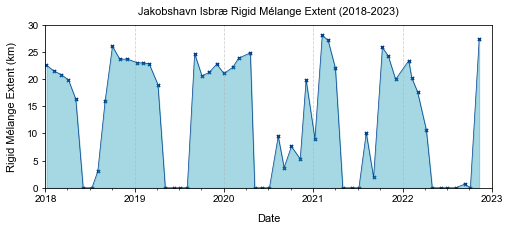

In [3]:
# CREATE A PLOT WITH GRID LINES
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(8, 3))
plt.title('Jakobshavn Isbræ Rigid Mélange Extent (2018-2023)', pad=10, fontsize=11)
plt.grid(axis = 'x', alpha=0.6, linestyle='--')
plt.ylabel('Rigid Mélange Extent (km)', labelpad=10, fontsize=11)
plt.xlabel('Date', labelpad=10, fontsize=11)

# PLOT THE RIGID MELANGE EXTENT
plt.scatter(terminus_position_date, rigid_melange_extent/1000, marker='x', s=10, color='#023e8a')
plt.plot(terminus_position_date, rigid_melange_extent/1000, linewidth=0.7, color='#023e8a')
plt.fill_between(terminus_position_date, 0, rigid_melange_extent / 1000, alpha=0.4, color='#219ebc')

# SET THE Y AXIS TICK LIMITS
plt.ylim(0, 30)
plt.yticks(np.arange(0, 30+1, 5))

# DEFINE THE FORMATTING FOR THE X-TICKS
year_locator = mdates.YearLocator(base=1, month=1, day=1)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)

plt.show()